### <center>Machine Learning </center>
### <center>Exercise No. 7: Classification using Decision Tree</center>

**Aim:** To classify given data using Decision Tree classifier and observe effect of pre-prunning on overfitting.

**Prerequisites:** Concepts of classification, Decision tree classifier, Overfitting and underfitting in machine learning,Basic Data structures in python like list, tuple, dictionaary and control structures in python, sklearn.

**Outcomes:** After completion of this experiment students will be able to classify the data using tree based algorithm i.e. Decision Tree and identify and remove overfitting in Decision Tree

A decision tree is non parametric supervised learning algorithm. It uses a tree structure, in which there are two types of nodes: decision node and leaf node. A decision node splits the data into two branches by asking a boolean question on a feature. A leaf node represents a class. The training process is about finding the “best” split at a certain feature with a certain value. And the predicting process is to reach the leaf node from root by answering the question at each decision node along the path.
The term “best” split means that after split, the two branches are more “ordered” than any other possible split. How do we define more ordered? It depends on which metric we choose. In general, there are two types of metric: gini impurity and entropy. The smaller these metrics are, the more “ordered” the dataset is.

**Basic algorithm (a greedy algorithm)**
* Tree is constructed in a top-down recursive divide-and-conquer manner

* At start, all the training examples are at the root

* Attributes are categorical (if continuous-valued, they are discretized in advance)

* Examples are partitioned recursively based on selected attributes

* Test attributes are selected on the basis of a heuristic or statistical measure (e.g., information gain)

**Conditions for stopping partitioning**

* All samples for a given node belong to the same class

* There are no remaining attributes for further partitioning – majority voting is employed for classifying the leaf

* There are no samples left

**Entropy**

$entropy= $info(D)= -$\sum_1^m$$P_i$$log_2$$P_i$

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.  Entropy is nothing but the measure of disorder. (You can think of it as a measure of purity as well). Entropy, as it relates to machine learning, is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. 

Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.
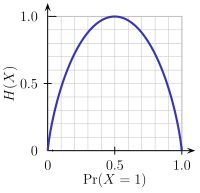

**Information Gain**

We select the attribute with highest information gain for classification

$info_A (D)= $$\sum_1^d$$\frac{|D_j|}{|D|}$

$Gain(A)=$$info(D)$ - $info_A(D)$

**Gini Impurity**


Pure means, in a selected sample of dataset all data belongs to same class.
Impure means, data is mixture of different classes. Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.
If our dataset is Pure then likelihood of incorrect classification is 0. If our sample is mixture of different classes then likelihood of incorrect classification will be high.

The training process is essentially building the tree. A key step is determining the “best” split. The procedure is as follows: we try to split the data at each unique value in each feature, and choose the best one that yields the least disorder.
A decision node specifies the feature and value upon which it will split. It also points to its left and right children. A leaf node includes a dictionary similar to a Counter object showing how many training examples for each class. This is useful to calculate the accuracy for training (although it is not necessary since we could get the accuracy by predicting each example after the model is trained). In addition, it leads to the resulting prediction for each example that reaches this leaf.
Decision trees are prone to overfitting, especially when a tree is particularly deep. This is due to the amount of specificity we look at leading to smaller sample of events that meet the previous assumptions. This small sample could lead to unsound conclusions.
To prevent overfitting, there are two ways: 1. we stop splitting the tree at some point; 2. we generate a complete tree first, and then get rid of some branches. 

Ideally, we would like to minimize both error due to bias and error due to variance. Enter random forests. Random forests mitigate this problem well. A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models.

The tree is able to classify dataset that is not linearly separable, it relies heavily on the quality of training data and its accuracy decreases around decision boundaries. One way to address this drawback is feature engineering. 
Advantages to using decision trees:
1. Easy to interpret and make for straightforward visualizations.
2. The internal workings are capable of being observed and thus make it possible to reproduce work.
3. Can handle both numerical and categorical data.
4. Perform well on large datasets
5. Are extremely fast

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
x=iris.data

In [ ]:
y=iris.target

In [ ]:
type(x)

In [ ]:
x=pd.DataFrame(x)

In [ ]:
type(x)

In [ ]:
x.shape

In [ ]:
x.info()

In [ ]:
x.head()

In [ ]:
x.describe()

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.7, random_state=1)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

In [ ]:
#Maximum Depth of a Tree- This parameter determines the maximum depth of the tree. 
#A higher value of this variable causes overfitting and a lower value causes underfitting.
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

In [ ]:
y_pred = clf_gini.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

In [ ]:
y_pred = clf_entropy.predict(X_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

In [ ]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)
#a=X_train2.columns[imp_features]
#b=list(a)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)